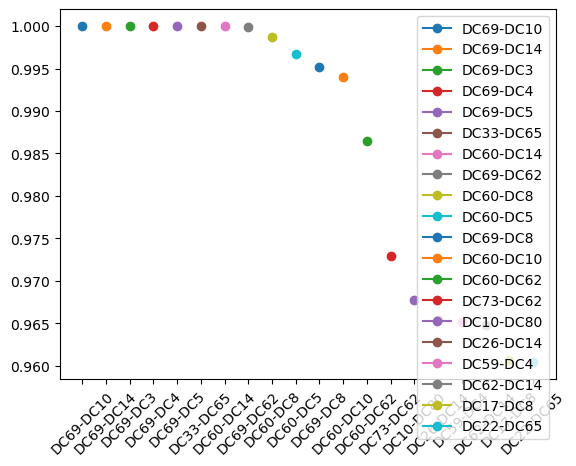

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据
data0 = pd.read_csv("data0.csv")
prediction = pd.read_csv("problem1_prediction.csv")

# 计算每个线路的最大值
max_values = data0.groupby(['place1', 'place2'])['num'].max().reset_index()
max_values.columns = ['place1', 'place2', 'max_num']

# 计算prediction中每个线路的平均值
avg_prediction = prediction.groupby(['place1', 'place2'])['num'].mean().reset_index()
avg_prediction.columns = ['place1', 'place2', 'mean_num']

# 计算线路负荷
load = pd.merge(avg_prediction, max_values, on=['place1', 'place2'], how='left')
load['load'] = load['mean_num'] / load['max_num']

# 将线路负荷输出到CSV文件
load.to_csv("problem4_road_rate.csv", index=False)

# 按负荷降序排列，获取前20名线路
top_20_load = load.sort_values(by='load', ascending=False).head(20)

# 可视化
fig, ax = plt.subplots()

for index, row in top_20_load.iterrows():
    place1 = row['place1']
    place2 = row['place2']
    route = f"{place1}-{place2}"
    loads = row['load']

    ax.plot(route, loads, marker='o', label=route)


ax.legend(loc='best')
plt.xticks(rotation=45)
plt.show()


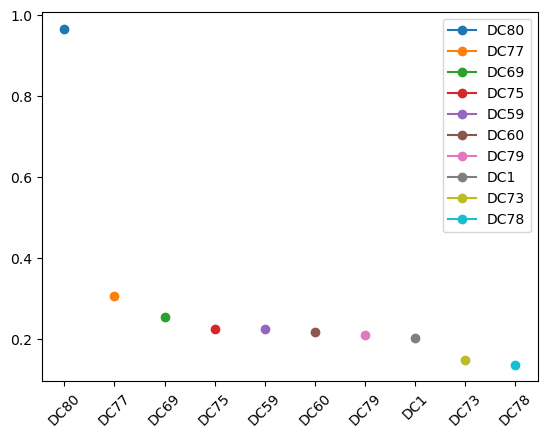

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据
data0 = pd.read_csv("data0.csv")
prediction = pd.read_csv("problem1_prediction.csv")

# 计算data0中每个结点的最大值
data0_place1 = data0.groupby('place1')['num'].max().reset_index()
data0_place1.columns = ['place', 'max_num_place1']

data0_place2 = data0.groupby('place2')['num'].max().reset_index()
data0_place2.columns = ['place', 'max_num_place2']

data0_max = pd.merge(data0_place1, data0_place2, on='place', how='outer').fillna(0)
data0_max['max_num'] = data0_max['max_num_place1'] + data0_max['max_num_place2']
data0_max = data0_max[['place', 'max_num']]

# 计算prediction中每个结点的平均值
prediction_place1 = prediction.groupby('place1')['num'].mean().reset_index()
prediction_place1.columns = ['place', 'mean_num_place1']

prediction_place2 = prediction.groupby('place2')['num'].mean().reset_index()
prediction_place2.columns = ['place', 'mean_num_place2']

prediction_mean = pd.merge(prediction_place1, prediction_place2, on='place', how='outer').fillna(0)
prediction_mean['mean_num'] = prediction_mean['mean_num_place1'] + prediction_mean['mean_num_place2']
prediction_mean = prediction_mean[['place', 'mean_num']]

# 计算结点负荷
node_load = pd.merge(prediction_mean, data0_max, on='place', how='left')
node_load['load'] = node_load['mean_num'] / node_load['max_num']

# 将结点负荷输出到CSV文件
node_load.to_csv("problem4_road_rate.csv", index=False)

# 按负荷降序排列，获取前10名结点
top_10_node_load = node_load.sort_values(by='load', ascending=False).head(10)

# 可视化
fig, ax = plt.subplots()

for index, row in top_10_node_load.iterrows():
    place = row['place']
    load = row['load']

    ax.plot(place, load, marker='o', label=place)


ax.legend(loc='best')
plt.xticks(rotation=45)

plt.show()
